In [2]:
import glob
import ugradio
import numpy as np
import astropy
#import calibrate
import pyfits
from ugradio import nch
from astropy.io import fits
import ugradio.agilent
from ugradio import leo
import matplotlib.pyplot as plt
%matplotlib inline
#import leuschner

In [5]:
from scipy.interpolate import griddata

### practice

In [1]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


In [15]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
print len(grid_x[0])
print len(grid_y)
print len(grid_y[0])

200
100
200


In [18]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])
#print points

[[ 0.76529814  0.19394651]
 [ 0.57370024  0.90045755]
 [ 0.73432072  0.37723204]
 ..., 
 [ 0.38766428  0.76310467]
 [ 0.78052294  0.77669015]
 [ 0.20384154  0.8192366 ]]


In [61]:
print type(values)

<type 'numpy.ndarray'>


In [6]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


In [59]:
type(func(grid_x, grid_y))

numpy.ndarray

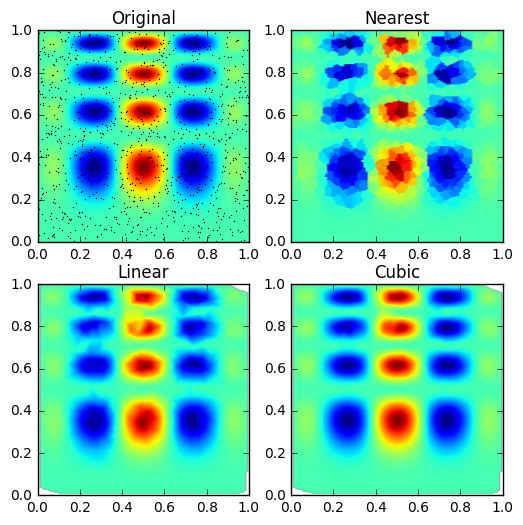

In [7]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

In [19]:
b_data = [(pyfits.open(f)) for f in glob.glob('/home/sczhou/ugradio/more data/data_*.fits')]

### cylindrical equidistant projection

In [16]:
lat = np.linspace(0, 179, 180)
lon = np.linspace(0,359,360)
#print lon
#print latitudes

In [71]:
grid_x, grid_y = np.mgrid[105:159:54j, 14:50:36j]

In [20]:
# change the average function in for loop for HI line
l_array = []
b_array = []
data_array = [] #first polarization

for i in range(len(b_data)):
    l_array.append(b_data[i][0].header['L'])
    b_array.append(b_data[i][0].header['B'])
    
    data_array.append(sum(b_data[i][1].data['auto0_real'])/len(b_data[i][1].data['auto0_real']))
    # take the average of each spectrum

In [22]:
# closing the files
for i in range(len(b_data)):
    b_data[i].close()

In [65]:
print('l:',min(l_array),'-',max(l_array))
print('b:',min(b_array),'-',max(b_array))

('l:', 105.0277768850446, '-', 158.9890854425101)
('b:', 14.79207923221549, '-', 48.96447374844922)


In [52]:
coord = [[0] * 2 for i in range(411)]
#print len(l_array),len(b_array)
for i in range(len(l_array)):
    coord[i][0]=l_array[i]
    coord[i][1]=b_array[i]
    #print('done:',i)


In [56]:
print coord[0]
print l_array[0:2]
print b_array[0:2]
print len(data_array)
print len(coord)

[144.9820256264667, 36.82436038215454]
[144.9820256264667, 115.0583264239571]
[36.82436038215454, 40.92500430686611]
411
411


In [54]:
test = [[1,2],[3,4],[5,6]]
test[0]

[1, 2]

In [75]:
grid_z = griddata(coord, data_array, (grid_x, grid_y))

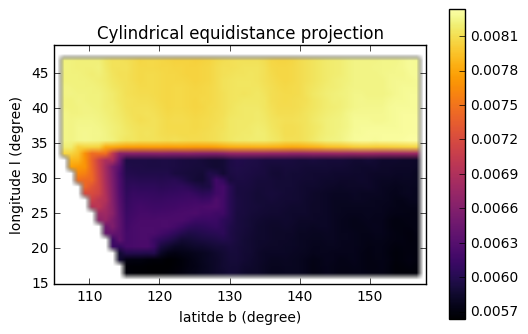

In [77]:
#plt.subplot(121)
#plt.imshow(np.array(data_array).T, extent=(0,360,0,180), origin='lower')
#plt.plot(coord[:,0], coord[:,1], 'k.', ms=1)
#plt.title('Original')
plt.subplot(111)
plt.imshow(grid_z.T, cmap='inferno',extent=(105,158,15,49), origin='lower')
plt.colorbar()
plt.xlabel('latitde b (degree)')
plt.ylabel('longitude l (degree)')
plt.title('Cylindrical equidistance projection')

### stereographic projection

In [78]:
x_array = []
y_array = []

for i in range(len(l_array)):
    R = np.tan(0.5*(90-b_array[i]))
    temp_x = R * np.cos(l_array[i])
    temp_y = R * np.sin(l_array[i])
    
    x_array.append(temp_x)
    y_array.append(temp_y)

In [79]:
print('x:',min(x_array),'-',max(x_array))
print('y:',min(y_array),'-',max(y_array))

('x:', -133.97457131339598, '-', 785.91393848526945)
('y:', -111.86557531098207, '-', 439.97137927285775)


In [80]:
coord = [[0] * 2 for i in range(411)]
#print len(l_array),len(b_array)
for i in range(len(x_array)):
    coord[i][0]=x_array[i]
    coord[i][1]=y_array[i]
    #print('done:',i)


In [81]:
grid_x, grid_y = np.mgrid[-133:785:918j, -111:439:550j]

In [82]:
grid_z = griddata(coord, data_array, (grid_x, grid_y))

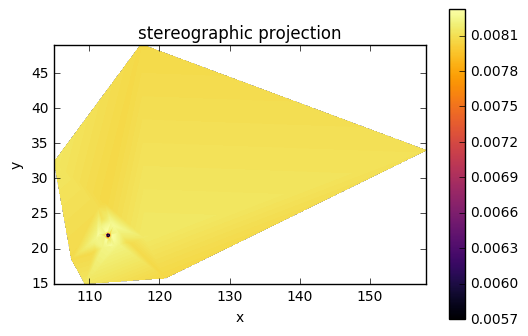

In [85]:
plt.imshow(grid_z.T, cmap='inferno',extent=(105,158,15,49), origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('stereographic projection')